In [15]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [17]:
import seaborn as sns

<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_20_Seaborn Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 🟩 Top Companies Bar Plot (2.20.1)

**Problem Statement:**

Create a Seaborn bar plot to visualize the top 5 companies with the highest median <code>salary_year_avg</code> for Data Scientist job postings in the United States.

**Hint:**

Use <code>sns.barplot()</code> to create the bar plot and sort the companies by median salary.

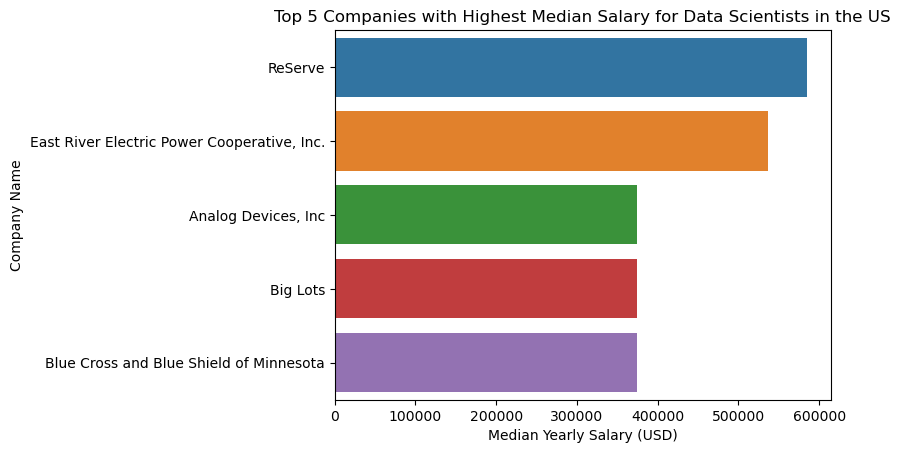

In [24]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies, x='salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

---

## 🟨 Data Scientist Salary Histogram (2.20.2)

**Problem Statement:**

Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the <code>salary_year_avg</code> column) for Data Scientist job postings in the United States:

- Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.
- Use 25 bins for the histogram and set the x-axis limit to 700,000.
- Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and label the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'.

**Hint:**

Use the <code>sns.histplot()</code> function to create the histogram and filter the DataFrame using boolean indexing.

In [26]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


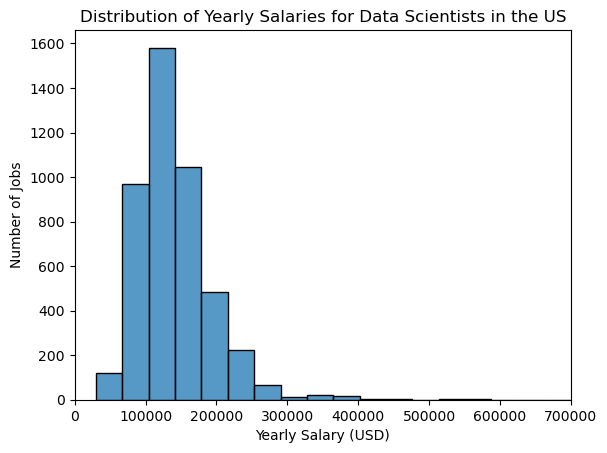

In [30]:
sns.histplot(data=df_DS_US, x='salary_year_avg', bins=25)
plt.title('Distribution of Yearly Salaries for Data Scientists in the US')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0,700000)
plt.show()

---

## 🟨 Data Roles Salary Box Plot (2.20.3)

**Problem Statement:**

Create a box plot using Seaborn to compare the yearly salaries (use the <code>salary_year_avg column</code>) of Data Analyst, Data Engineer, and Data Scientist job postings in India:

- Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.
- Set the x-axis limit to 300,000 and format it as $100k.
- Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.

**Code Needed:**

<code>job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']</code>

**Hint:**

Use the <code>sns.boxplot()</code> function to visualize the salary distributions and format the x-axis labels to reflect thousands as 'k' using <code>plt.FuncFormatter</code>.

In [35]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_india = df[(df['job_country'] == 'India') & (df['job_title_short'].isin(job_titles))].dropna(subset=['salary_year_avg']).copy()

---

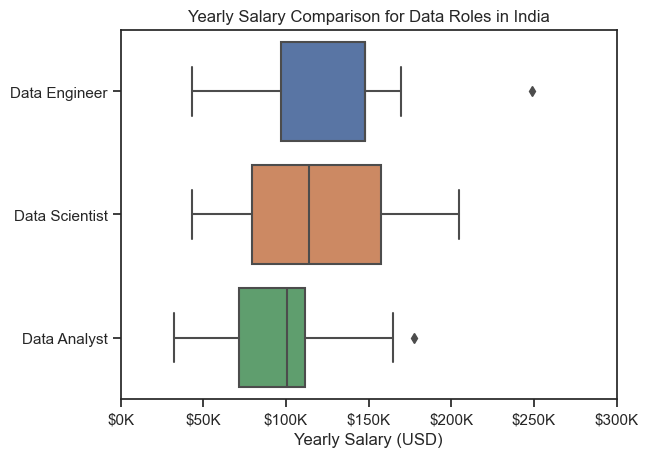

In [43]:
sns.boxplot(data=df_india, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')

plt.xlim(0, 300000)
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## 🟥 Salary Distribution for United States (2.20.4)

**Problem Statement:**

- Create a violin plot using Seaborn to visualize the distribution of <code>salary_year_avg</code> for Data Scientist roles in the United States.
- Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.

**Hint:**

- Use <code>sns.violinplot()</code> with the x parameter set to <code>job_country</code> and the <code>y</code> parameter set to <code>salary_year_avg</code>.
- Utilize <code>plt.ylim()</code> and <code>plt.gca().yaxis.set_major_formatter()</code> to set and format the salary axis.

In [44]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

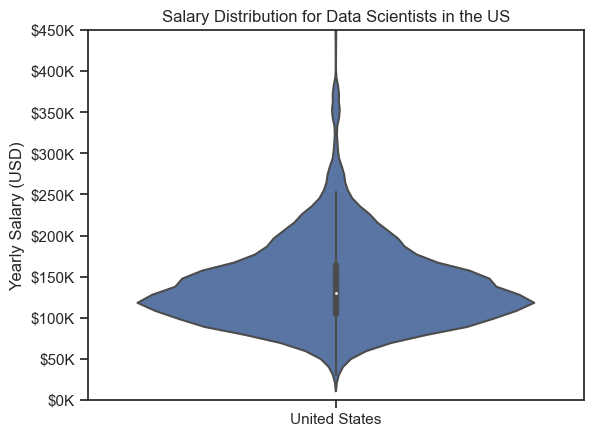

In [49]:
sns.violinplot(data=df_DS_US, x='job_country', y='salary_year_avg')
plt.title('Salary Distribution for Data Scientists in the US')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0,450_000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().yaxis.set_major_formatter(ticks_x)

---